# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import importlib_resources
import importlib

import xarray as xr
import os
import pooch
from amocarray import readers, writers, plotters, tools, utilities


/home/runner/work/amocarray/amocarray/amocarray/tools.py:160: SyntaxWarning: invalid escape sequence '\d'
  fill_val = 2 ** (int(re.findall("\d+", str(new_dtype))[0]) - 1) - 1


In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, 'data')

### Load RAPID 26°N

In [3]:
# Load data from data/moc_transports
ds_rapid = readers.load_sample_dataset()
ds_rapid = ds_rapid.rename_dims({'time': 'TIME'})
ds_rapid = ds_rapid.rename({'time': 'TIME'})

/tmp/ipykernel_3152/1003140237.py:4: UserWarning: rename 'time' to 'TIME' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds_rapid = ds_rapid.rename({'time': 'TIME'})


In [4]:
plotters.show_contents(ds_rapid)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
TIME,TIME,,,,datetime64[ns]
moc_mar_hc10,TIME,Sv,,,float64
t_aiw10,TIME,Sv,,,float64
t_bw10,TIME,Sv,,,float64
t_ek10,TIME,Sv,,,float64
t_gs10,TIME,Sv,,,float64
t_ld10,TIME,Sv,,,float64
t_therm10,TIME,Sv,,,float64
t_ud10,TIME,Sv,,,float64


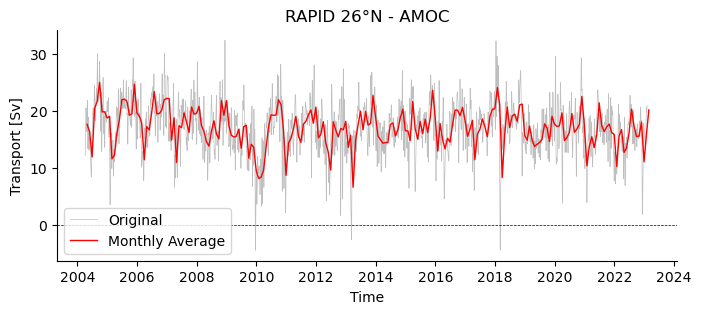

In [5]:
import matplotlib.pyplot as plt

# Resample the dataset to monthly averages
ds_monthly = ds_rapid.resample(TIME='ME').mean()

# Initialize the figure and axes with a specific figure size
fig, axes = plt.subplots(figsize=(8, 3))

# Plot the original dataset in thin grey
plt.plot(ds_rapid['TIME'], ds_rapid['moc_mar_hc10'], color='grey', alpha=0.5, linewidth=0.5, label='Original')

# Plot the monthly averaged dataset in thick red
plt.plot(ds_monthly['TIME'], ds_monthly['moc_mar_hc10'], color='red', linewidth=1, label='Monthly Average')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Customize the axes
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Add title and labels
plt.title('RAPID 26°N - AMOC')
plt.xlabel('Time')
plt.ylabel('Transport [Sv]')
plt.legend()



### Load MOVE 16°N

In [6]:
datasets16 = readers.read_16N("https://mooring.ucsd.edu/move/nc/")
plotters.show_variables(datasets16)

OS_MOVE_TRANSPORTS.nc
OS_MOVE_TRANSPORTS.nc
https://mooring.ucsd.edu/move/nc//OS_MOVE_TRANSPORTS.nc
/home/runner/.amocarray_data/OS_MOVE_TRANSPORTS.nc


information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
TIME,TIME,,,time,datetime64[ns]
TRANSPORT_TOTAL,TIME,Sverdrup,,ocean_volume_transport_across_line,float64
transport_component_boundary,TIME,Sverdrup,,,float64
transport_component_internal,TIME,Sverdrup,,,float64
transport_component_internal_offset,TIME,Sverdrup,,,float64


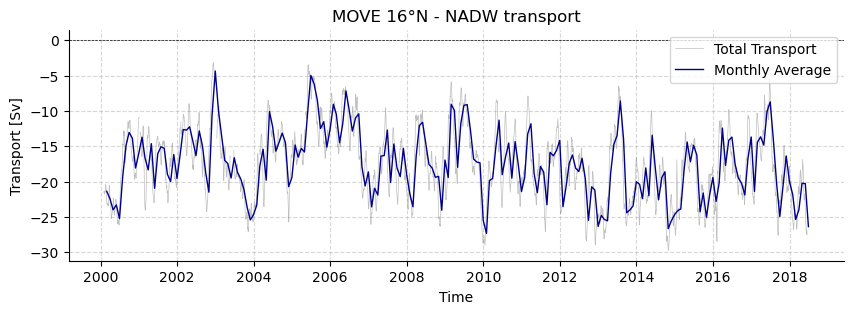

In [7]:
# Resample the dataset to monthly averages
ds_monthly = datasets16.resample(TIME='ME').mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the total transport from the MOVE dataset in thin grey
ax.plot(datasets16['TIME'], datasets16['TRANSPORT_TOTAL'], color='grey', alpha=0.5, linewidth=0.5, label='Total Transport')

# Plot the monthly averaged dataset in thick red
ax.plot(ds_monthly['TIME'], ds_monthly['TRANSPORT_TOTAL'], color='darkblue', linewidth=1, label='Monthly Average')
# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Customize the axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels, title, and legend
ax.set_title('MOVE 16°N - NADW transport')
ax.set_xlabel('Time')
ax.set_ylabel('Transport [Sv]')
ax.legend()

# Customize the grid
ax.grid(True, linestyle='--', alpha=0.5)

### Load OSNAP

In [8]:
datasetsOSNAP = readers.read_osnap()
plotters.show_variables(datasetsOSNAP)

/home/runner/.amocarray_data/download


information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
MFT_ALL,TIME,Sv,,,float64
MFT_ALL_ERR,TIME,Sv,Determined from a Monte Carlo analysis,,float64
MFT_EAST,TIME,Sv,,,float64
MFT_EAST_ERR,TIME,Sv,Determined from a Monte Carlo analysis,,float64
MFT_WEST,TIME,Sv,,,float64
MFT_WEST_ERR,TIME,Sv,Determined from a Monte Carlo analysis,,float64
MHT_ALL,TIME,PW,,,float64
MHT_ALL_ERR,TIME,PW,Determined from a Monte Carlo analysis,,float64
MHT_EAST,TIME,PW,,,float64


### Load SAMBA 34.5°S

In [9]:
datasets34S = readers.read_34S()

../data/Upper_Abyssal_Transport_Anomalies.txt


../data/MOC_TotalAnomaly_and_constituents.asc


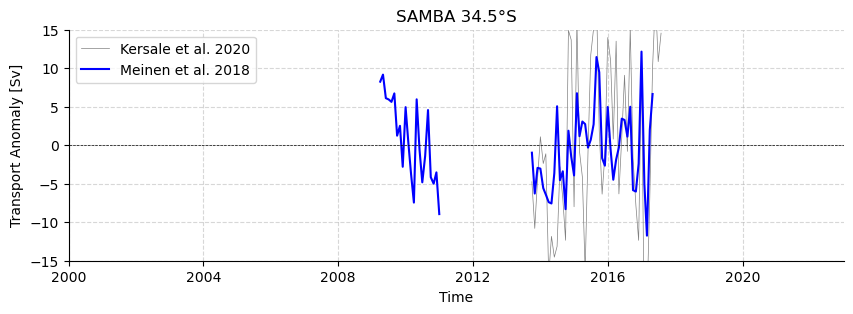

In [10]:
# Extract the upper and abyssal transport data
ds = datasets34S[0]
upper_transport = ds['UPPER_TRANSPORT']
ds2 = datasets34S[1]
moc_meinen = ds2['MOC']


# Resample the dataset to monthly averages
upper_transport_monthly = upper_transport.resample(TIME='ME').mean()
moc_meinen_monthly = moc_meinen.resample(TIME='ME').mean()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the original upper transport in thin blue
ax.plot(upper_transport_monthly['TIME'], upper_transport_monthly, color='grey', linewidth=0.5, label='Kersale et al. 2020')
ax.plot(moc_meinen_monthly['TIME'], moc_meinen_monthly, color='blue', alpha=1, linewidth=1.5, label='Meinen et al. 2018')


# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Customize the axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels, title, and legend
ax.set_title('SAMBA 34.5°S')
ax.set_xlabel('Time')
ax.set_ylabel(f"{upper_transport.attrs['standard_name']} [{upper_transport.attrs['units']}]")
ax.legend()
# Set the x-axis limits from 2000 to 2022
import pandas as pd
ax.set_xlim([pd.Timestamp('2000-01-01'), pd.Timestamp('2022-12-31')])

# Set the y-axis limits from -15 to 15
ax.set_ylim([-15, 15])

# Customize the grid
ax.grid(True, linestyle='--', alpha=0.5)

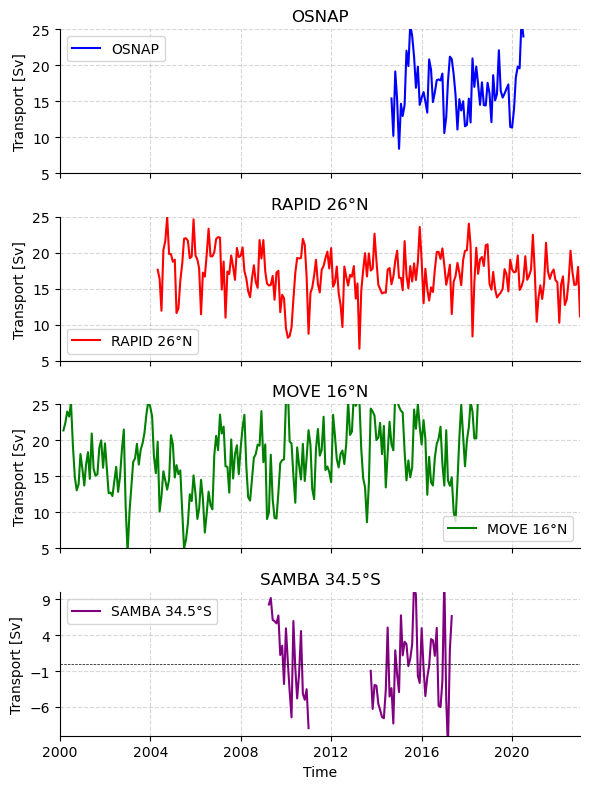

In [11]:
importlib.reload(plotters)
plotters.plot_monthly_anomalies(
    osnap_data=datasetsOSNAP['MOC_ALL'],
    rapid_data=ds_rapid['moc_mar_hc10'],
    move_data=-datasets16['TRANSPORT_TOTAL'],
    samba_data=datasets34S[1]['MOC'],
    osnap_label='OSNAP',
    rapid_label='RAPID 26°N',
    move_label='MOVE 16°N',
    samba_label='SAMBA 34.5°S'
)
